<a href="https://colab.research.google.com/github/ChrisHallak/Sentiment-analysis-of-COVID-19-vaccine-through-tweets/blob/main/Sentiment_Analysis_of_Covid19_Vaccines_Tweets_Using_NLP_(Preprocessing_Visualization_Embedding).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [1]: Prepare libraries and data

In [ ]:
!pip install emoji
!pip install camel.tools
!pip install Arabic-Stopwords
!pip install qalsadi
!pip install arabic-reshaper
!pip install python-bidi

## [1.1] Include important libraries

In [ ]:
from camel_tools.utils.normalize import normalize_alef_maksura_ar
from camel_tools.utils.normalize import normalize_teh_marbuta_ar
from camel_tools.utils.normalize import normalize_alef_ar
import arabicstopwords.arabicstopwords as stp
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from matplotlib import pyplot as plt
from bidi.algorithm import get_display
import qalsadi.lemmatizer
import unicodedata as ud
import seaborn as seb
import arabic_reshaper
import string
import pandas as pd
import re
import nltk
import emoji
import numpy as np



lemmer = qalsadi.lemmatizer.Lemmatizer()
sw = stp.stopwords_list()


## [1.2] Download data

In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1KepfzAhJ7dloG8XaWQf0ovQipDHYS8aI' -O 'final_data.zip'

--2021-12-06 04:02:02--  https://drive.google.com/uc?export=download&id=1KepfzAhJ7dloG8XaWQf0ovQipDHYS8aI
Resolving drive.google.com (drive.google.com)... 172.217.204.101, 172.217.204.102, 172.217.204.100, ...
Connecting to drive.google.com (drive.google.com)|172.217.204.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-00-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3fr3unlgsobj83qtce6fg8qfmnk6pkf4/1638763275000/04260309330816471542/*/1KepfzAhJ7dloG8XaWQf0ovQipDHYS8aI?e=download [following]
--2021-12-06 04:02:03--  https://doc-0o-00-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3fr3unlgsobj83qtce6fg8qfmnk6pkf4/1638763275000/04260309330816471542/*/1KepfzAhJ7dloG8XaWQf0ovQipDHYS8aI?e=download
Resolving doc-0o-00-docs.googleusercontent.com (doc-0o-00-docs.googleusercontent.com)... 173.194.218.132, 2607:f8b0:400c:c14::84
Connecting to doc-0o-00-docs.googleusercontent.com (d

In [ ]:
!unzip final_data.zip

Archive:  final_data.zip
  inflating: test.csv                
  inflating: train.csv               
  inflating: valid.csv               


## [1.3] read data from csv file

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,tweet,label
0,#تبني_قطط_انقاذ من الخاص هاااام كيتن أنثى عمره...,2
1,'#خذ_الخطوة_خذ_اللقاح \nالحمدالله من قبل ومن ب...,1
2,لو اللي مثلك وشرواك طعمو كان قد حذفنا الكمامات...,1
3,#الصحة:•نحو 14.5 مليون شخص تم إعطاؤهم جرعة لقا...,1
4,• في منظور القوة البشرية ( الأزمة ستطول لأشهر ...,3


# [2]: Cleaning And Normalization

## [2.1] Removing Mentions


In [ ]:
# تابع لإزالة المنشنات إذا كانت قيمة المتغير البولياني 1 نقوم بحذف المنشنات وإلا سترجع التغريدة كما هي
# الدخل عبارة عن تغريدة
# الخرج تغريدة خالية من المنشنات

def remove_mentions(tweet,work = 1):
  if work == 1:
    tweet = re.sub(r"@\S+", '', tweet)
  return tweet


##### testing function
test = df['tweet'][25]
print("tweet before cleaning : " , test , '\n--------------------------------------------------')
print("tweet after cleaning : " ,remove_mentions(test))

tweet before cleaning :  @NajlaQahtani1 الصحة...  
--------------------------------------------------
tweet after cleaning :   الصحة... 


## [2.2] Removing Hyperlinks


In [ ]:
# تابع لإزالة الروابط إذا كانت قيمة المتغير البولياني 1 نقوم بحذف الروابط وإلا سترجع التغريدة كما هي
# الدخل تغريدة
# الخرج تغريدة خالية من الروابط

def remove_hyperlinks(tweet,work=1):
  if work == 1:
    tweet = re.sub(r'https?\S+', '', tweet)
  return tweet

###======================================================================

##### testing function
test = df['tweet'][10]
print("tweet before cleaning : " , test , '\n--------------------------------------------------------------------')
print("tweet after cleaning : " ,remove_hyperlinks(test))

tweet before cleaning :  روضة هباس تبعد عن مركز الشعبة 80 كلم ذ وع. https://t.co/ragWfqz3ii 
--------------------------------------------------------------------
tweet after cleaning :  روضة هباس تبعد عن مركز الشعبة 80 كلم ذ وع. 


## [2.3] Removing Pictures Links


In [ ]:
# تابع لإزالة الروابط إذا كانت قيمة المتغير البولياني 1 نقوم بحذف روابط الصور وإلا سترجع التغريدة كما هي
# الدخل تغريدة
# الخرج تغريدة خالية من روابط صور

def remove_picURL(tweet,work = 1):
  if work == 1:
    tweet = re.sub(r'pic.twitter.com/[\w]*',"", tweet)
  return tweet

###======================================================================

#### تابع إضافي لكن لايوجد في الداتا سيت الحالية مثال عليها للتجريب لذا سيتم تجريب مثال خارجي
test = "corona virus looks like pic.twitter.com/corona"
print("tweet before cleaning : " , test , '\n--------------------------------------------------------------------')
print("tweet after cleaning : " ,remove_picURL(test))

tweet before cleaning :  corona virus looks like pic.twitter.com/corona 
--------------------------------------------------------------------
tweet after cleaning :  corona virus looks like 


## [2.4] Removing Frequency Letters


In [ ]:
# تابع لإزالة الأحرف الزائدة مثل كووورونا وترك حرف واحد من التكررات وهو نوع من توحيد كتابة الكلمات

def remove_extraLetters(tweet,work =1):
  if work == 1:
     tweet = re.sub(r'(.)\1+', r'\1', tweet)
  return tweet

###======================================================================

##### testing function
test = df['tweet'][0]
print("tweet before cleaning : " , test , '\n--------------------------------------------------------------------')
print("tweet after cleaning : " ,remove_extraLetters(test))

########### كلمة هااااااام أصبحت هام

tweet before cleaning :  #تبني_قطط_انقاذ من الخاص هاااام كيتن أنثى عمرها ٥٩ يوم اخذتها حديثه الولاده عمرها ٣ ايام تم التطعيم امس سبب العرض للتبني انا اعتني بالقطط حديثه الولاده  وعند اكتمال شهرين يحتاجوا مساحة  وانا ما عندي هادي لوجود اكثر من ٧ قطط حديثه الولاده للتواصل @saad28234346 التبني الرياض  
--------------------------------------------------------------------
tweet after cleaning :  #تبني_قط_انقاذ من الخاص هام كيتن أنثى عمرها ٥٩ يوم اخذتها حديثه الولاده عمرها ٣ ايام تم التطعيم امس سب العرض لتبني انا اعتني بالقط حديثه الولاده وعند اكتمال شهرين يحتاجوا مساحة وانا ما عندي هادي لوجود اكثر من ٧ قط حديثه الولاده لتواصل @sad28234346 التبني الرياض 


 سبب إزالة الأحرف المتكررة :
 عند الكتابة باللغة العامية لايوجد قاعدة عامة لكتابة الكلمة وبالتالي سينتج
 الكثير من الكلمات التي تكتب بطرق بطرق مختلفة مثل تكرار أحرف معينة
 لذلك يجب إزالة هذه الأحرف كنوع من توحيد الداتا وهذا يفيد في تقليل الngram

## [2.5] Removing Non_Arabic Characters, Numbers,Special Characters


In [ ]:
# (أرقام وأحرف ومحارف مميزة مثل الأقواس) تابع لإزالة المحارف الغير العربية
# الدخل تغريدة
#  الخرج تغريدة خالية من كل المحارف الغير العربية
# \u0600-\u06FF الكود للأحرف العربية

def remove_non_arabic_characters(tweet,work=1):
  if work == 1:
    tweet = re.sub(r"[^\u0600-\u06FF]+", " ",tweet);
  return tweet

###======================================================================

####### testing function
test = df['tweet'][15]
print("tweet before cleaning : " , test , '\n--------------------------------------------------------------------')
print("tweet after cleaning : " ,remove_non_arabic_characters(test))

###### في هذا المثال تم إزالة الأرقام الانكليزية والأحرف الانكليزية والأقواس

tweet before cleaning :  '14 ابريل  \nجرعة لقاح كورونا (اكسفورد)الاولى ✅'  
--------------------------------------------------------------------
tweet after cleaning :   ابريل جرعة لقاح كورونا اكسفورد الاولى 


إزالة الأرقام ليست دائما طريقة فعالة لأنه في بعض الحالات نخسر معلومات هامة إذا تم حذفها مثال إذا كان الرقم من أصل الاسم مثل كوفيد-19
أو في حال العدد يعطي أهمية للجملة مثل تغريدة تم اخد اللقاح من قبل 3 مليون شخص فهنا يدل على العدد الكبير الذي تلقى اللقاح لإظهار أهميته


## [2.6] Removing Emojis


In [ ]:
def remove_emojies(tweet,work = 1):
  if work == 1:
    return emoji.get_emoji_regexp().sub(r'', tweet)

###======================================================================

####### testing function
test = df['tweet'][33]
print("tweet before cleaning : " , test , '\n--------------------------------------------------------------------')
print("tweet after cleaning : " ,remove_emojies(test))

tweet before cleaning :  @ZdashtiZ @CGCKuwait مسكينه مو قاص عليها 😂😂😂وقال ان التطعيم يحمي 😂😂😂 يختي والله على الذكاء 
--------------------------------------------------------------------
tweet after cleaning :  @ZdashtiZ @CGCKuwait مسكينه مو قاص عليها وقال ان التطعيم يحمي  يختي والله على الذكاء


## [2.7] Removing Punctuations


In [ ]:
# unicodedata يساعد في معرفة فيما إذا كان المحرف علامة ترقيم أو لا
# الخرج يكون عبارة حرفين لمعرفة نوع المحرف ud.category
# إذا كان الكلاس الذي ينتمي إليه يبدأ بحرف البي يكون المحرف علامة ترقيم
# LL , PO  {L : Letter} {L : Lower} {P : Punctuation} {O : Other}
# لكن علامات الترقيم في هذه الممكتبة تتضمن الهاشتاغ لذلك تم وضع شرط الاور

def remove_punctuations(tweet,work = 1):
  if work == 1:
    clean_tweet = ""
    for c in tweet:
      if  ud.category(c).startswith('P') == 1 :
        clean_tweet += " "
      else :
        clean_tweet += c
    return clean_tweet
  else :
      return tweet
###======================================================================

####### testing function
test = df['tweet'][55]
print("tweet before cleaning : " , test , '\n--------------------------------------------------------------------')
print("tweet after cleaning : " ,remove_punctuations(test))



tweet before cleaning :  هو وين التطعيم اللي يسولفون عنه؟ 
--------------------------------------------------------------------
tweet after cleaning :  هو وين التطعيم اللي يسولفون عنه 


## [2.8] Removing StopWords


In [ ]:
# arabicstopwords مكتبة تجمع كل كلمات التوقف باللغة العربية
# sw قائمة بجميع كلمات التوقف

def remove_stopwords(tweet,work = 1):
  if work == 1:
    tokens = tweet.split()
    tweet = " ".join([token for token in  tokens if token not in sw])
  return tweet
###======================================================================

####### testing function
test = df['tweet'][360]
print("tweet before cleaning : " , test , '\n--------------------------------------------------------------------')
print("tweet after cleaning : " ,remove_stopwords(test))

tweet before cleaning :  ننتظر سقوط لقاح كورونا على أحر من الجمر 
--------------------------------------------------------------------
tweet after cleaning :  ننتظر سقوط لقاح كورونا أحر الجمر


## [2.9] Normalizations


In [ ]:
# تم استخدام كامل تولز من أجل عملات توحيد الألف والتاء المربوطة والألف المقصورة

def orthographic_normalization(tweet,work = 1):
  if work == 1:
    tweet = normalize_alef_ar(tweet)
    tweet = normalize_alef_maksura_ar(tweet)
    tweet = normalize_teh_marbuta_ar(tweet)
  return tweet

###======================================================================

  ####### testing function
test = df['tweet'][15]
print("tweet before cleaning : " , test , '\n--------------------------------------------------------------------')
print("tweet after cleaning : " ,orthographic_normalization(test))

tweet before cleaning :  '14 ابريل  \nجرعة لقاح كورونا (اكسفورد)الاولى ✅'  
--------------------------------------------------------------------
tweet after cleaning :  '14 ابريل  \nجرعه لقاح كورونا (اكسفورد)الاولي ✅' 


## [2.10] Lemmatization


In [ ]:
def lemmatization(tweet ,work = 1):
  if work == 1:
    lemmas = lemmer.lemmatize_text(tweet)
  return " ".join(lemmas)

###======================================================================

####### testing function
test = df['tweet'][3]
print("tweet before cleaning : ",test)
print("tweet after cleaning : " ,lemmatization(test))


tweet before cleaning :  #الصحة:•نحو 14.5 مليون شخص تم إعطاؤهم جرعة لقاح #كورونا•اللقاحات آمنة وبإمكان كل من تلقى اللقاح التبرع بالدم•يمكن تلقي جرعات مختلفة من لقاح كورونا
tweet after cleaning :  # صحة :• نحو 14 . 5 مليون شخص تم إعطاء جرعة لقاح # كار • لقاح آمن إمكان كل من ألقى لقاح تبرع دم • يم ألقى جرعة مختلف من لقاح كار


## [2.11] Removing Null Rows


In [ ]:
# تابع لحذف الأسطر الفارغة
def remove_null_rows(df):
  df = df[df['tweet'] != None]
  return df

In [ ]:
# اتابع المعالجة النهائية للتغريدة الواحدة حيث يتم فيه تطبيق كل التوابع السابقة من إزالة منشنات وروابط وصور وايموجيز وارقام وكلمات توقف
# الدخل تغريدة
# الخرج تغريدة معالجة نضيفة قابلة للتصنيف

def clean_tweet(tweet):
  tweet = remove_mentions(tweet,1)
  tweet = remove_hyperlinks(tweet,1)
  tweet = remove_picURL(tweet,1)
  tweet = remove_extraLetters(tweet,1)
  tweet = remove_punctuations(tweet,1)
  tweet = remove_non_arabic_characters(tweet,1)
  tweet = remove_emojies(tweet,1)
  tweet = remove_stopwords(tweet,1)
  tweet = lemmatization(tweet,1)
  tweet = orthographic_normalization(tweet,1)
  return tweet


## [2.11] Final Preprocessing


In [ ]:
# ـابع المعالجة النهائية يتم تطبيق تابع المعالجة النهائية للتغريدة الواحدة علة كل التغريدات
# حيث يتم إضافة عمود جديد في الفريم وورك يحتوي على التغريدات المنضفة

def preprocess(df,text_field):
  df['cleaned_tweet'] = df[text_field].apply(lambda x : clean_tweet(str(x)))
  return df



In [ ]:
df = remove_null_rows(df)
preprocess(df,'tweet')
df.head()

,tweet,label,cleaned_tweet
0,#تبني_قطط_انقاذ من الخاص هاااام كيتن أنثى عمره...,2,تبن انقاذ الخاص هام يتن انثي عمر ٥٩ يوم اخذتها...
1,'#خذ_الخطوة_خذ_اللقاح \nالحمدالله من قبل ومن ب...,1,اخذ خطوه اخذ قاح الحمداله اخذ يوم الجرعه اولي ...
2,لو اللي مثلك وشرواك طعمو كان قد حذفنا الكمامات...,1,ال شرو طعم حذف كمام ارتاح اذانينا لان لبس حين ...
3,#الصحة:•نحو 14.5 مليون شخص تم إعطاؤهم جرعة لقا...,1,صحه مليون شخص تم اعطاء جرعه لقاح كار قاح امن ا...
4,• في منظور القوة البشرية ( الأزمة ستطول لأشهر ...,3,منظور قوه بشر ازمه طول اشهر كار انتشار قاح احت...


# [3]: Data Visualization

## [3.1] Percentage for tweets_classes


In [ ]:
#حساب عدد التغريدات من أجل كل صنف نلاحظ أن النسبة الأكبر للتغريدات المحايدة للقاح

import seaborn as sns
cm = sns.light_palette("red", as_cmap=True)


df_classes = df.groupby('label').count()['tweet'].reset_index().sort_values(by='tweet')
df_classes.style.background_gradient(cmap =  cm)


,label,tweet
0,0,2783
2,2,3901
1,1,5334
3,3,7338


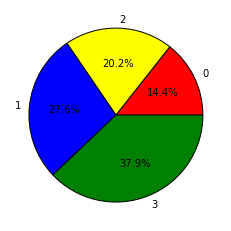

In [ ]:

percents = df_classes.tweet
labels = df_classes.label
colors = ['red','yellow','blue', 'green', '#26DE81']

my_pie,_,_ = plt.pie(percents,radius = 1,labels=labels,colors=colors,autopct="%.1f%%")
plt.setp(my_pie, width=1, edgecolor='black')
plt.show()

In [ ]:
# تابع يقوم بإرجاع التغريدات الخاصة بصنف معين
#  الدخل : الصنف المراد إرجاع التغريدات الخاصة به
# الخرج التغريدات المتعلقة بذلك الصنف

def get_label_tweets(label,df,textfield):
  label_tweets = df[df['label'] == label][textfield]
  tweets_list = [str(tweet) for tweet in label_tweets]
  return tweets_list
#============================================================================

###Testing function
### مثال لإرجاع التغريدات المعارضة للقاح
get_label_tweets(0,df,'cleaned_tweet')[:5]



['ماتشوفون واقع كثير ناس خذي جرعه واصيبوا قاح خفي مرض لايمنعه ولايمنع عدوي عد ليش احاط نفس احتمال داوم عالم متخوف',
 'امراه عشرين عمر ايام جرعه اولي استرازينيكا صداع شديد ذمه ماده بيضاء قشر نزيف عنكبوت انسداد جزء جيب سهم علو تخثر ناجم قاح نقص صفيح',
 'تجربه كر فايروس انفلونزا موسم صلح معي لقاح متحور متغير واقع اكد كوفيد ١٩ دل سارس الب',
 'مفروض حد انجبر تطعيم لان واحد قادر هتم صحه اجبار لها وكيل',
 'سلام شكوي بخصوص لقاح كار']

In [ ]:
# تابع يقوم بإرجاع كل التغريدات وتجميعها في ليستا
def get_all_tweets(df,text_field):
  all_tweets = [str(tweet) for tweet in df[text_field]]
  return all_tweets


## [3.2] N-Grams


In [ ]:

def bag_of_words(text,ngram, gram_name):
  cv = CountVectorizer(ngram_range=(ngram,ngram), max_features=1000)
  bagOfWords = cv.fit_transform(text)
  sum_words = bagOfWords.sum(axis=0)
  words_freq = {word: sum_words[0, i] for word, i in cv.vocabulary_.items()}
  res = {get_display(arabic_reshaper.reshape(k)): v for k,v in words_freq.items()}
  #df_gram = pd.DataFrame(res2.items(), columns=[get_ngram, 'Freq'])
  df_gram = pd.DataFrame({gram_name: list(res.keys()), 'Freq': list(res.values())})
  return df_gram
#==========================================================================
def draw_histogram(df ,title):
  plt.figure(figsize=(20, 10))
  histogram = seb.barplot(data=df, x =title, y = 'Freq')
  histogram.set_xticklabels(histogram.get_xticklabels(), rotation=30)
  plt.show()
#=========================================================================

def get_ngram(text,ngram, mx):
  df_gram = bag_of_words(text,ngram, str(ngram)+'-gram')
  df_gram = df_gram.nlargest(columns='Freq',n= mx)
  draw_histogram(df_gram, str(ngram)+'-gram')
#===========================================================================

def get_rare_words(text,ngram, mx):
  df_gram = bag_of_words(text, ngram, str(ngram)+'-gram')
  df_gram = df_gram.nsmallest(columns='Freq', n=mx)
  draw_histogram(df_gram,str(ngram)+'-gram')


#### Getting tweets for each class

In [ ]:
all_tweets =    get_all_tweets(df,'cleaned_tweet')
class0_tweets = get_label_tweets(0,df,'cleaned_tweet')
class1_tweets = get_label_tweets(1,df,'cleaned_tweet')
class2_tweets = get_label_tweets(2,df,'cleaned_tweet')
class3_tweets = get_label_tweets(3,df,'cleaned_tweet')




### [3.2.1] 1-Gram most frequently in all tweets


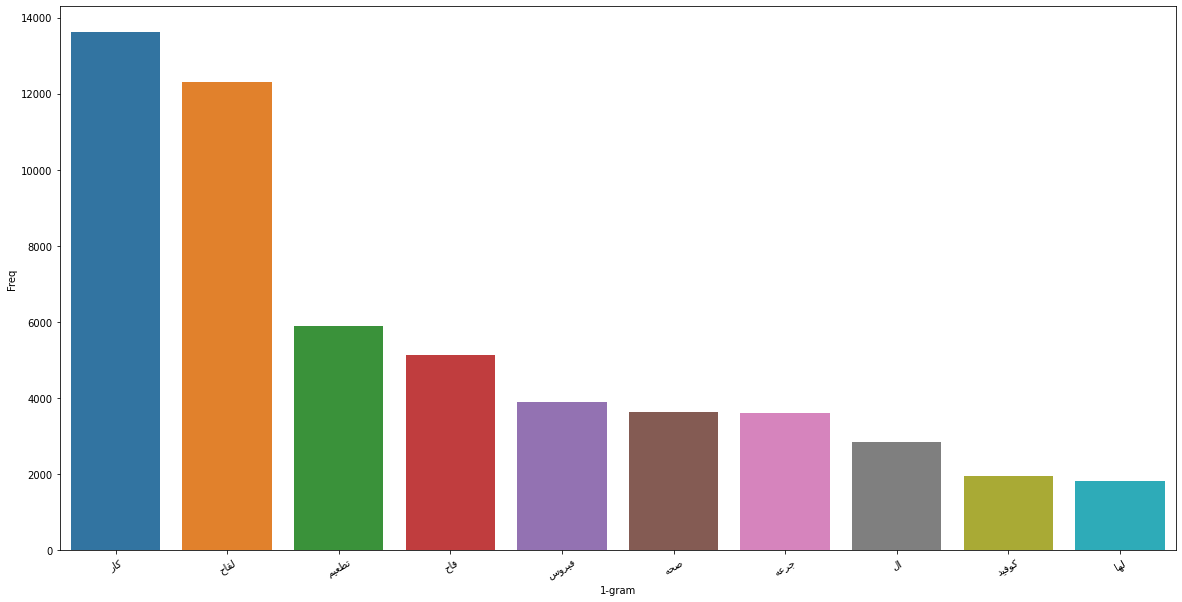

In [ ]:
get_ngram(all_tweets,1,10)

### [3.2.2] 1-Gram least frequently in all tweets


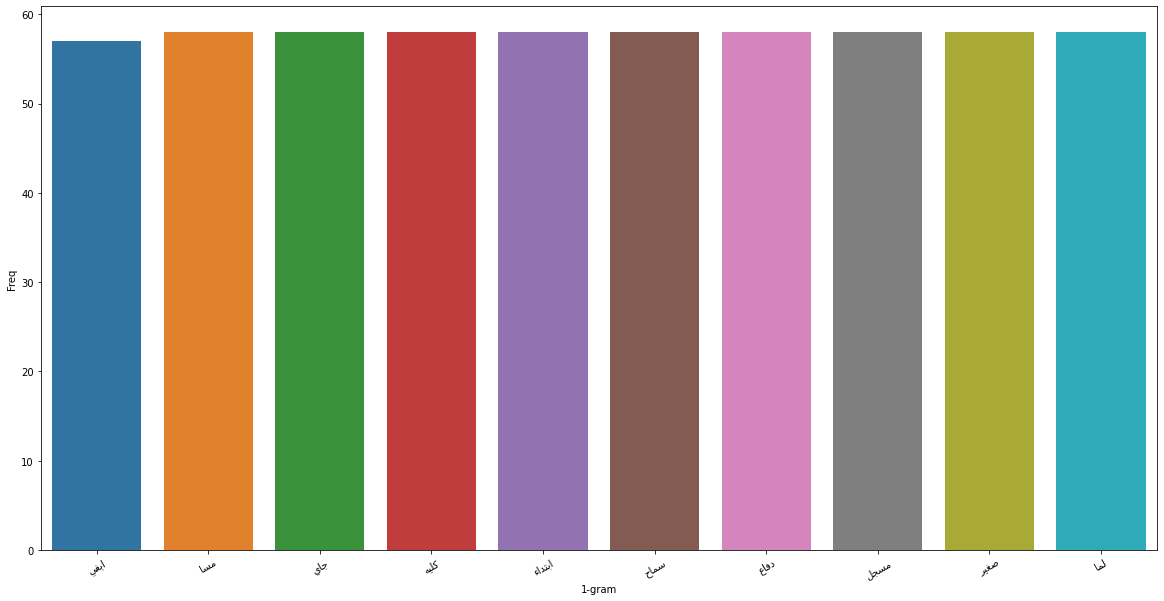

In [ ]:
get_rare_words(all_tweets,1,10)

### [3.2.3] 2-Gram most frequently in all tweets


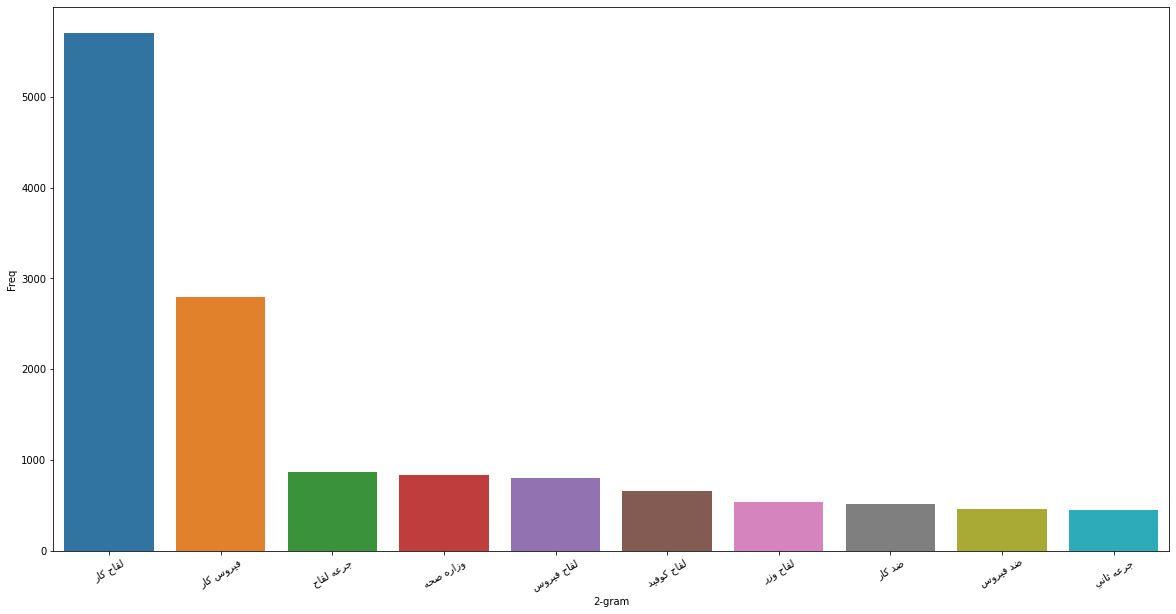

In [ ]:
get_ngram(all_tweets,2,10)

### [3.2.4] 2-Gram least frequently in all tweets


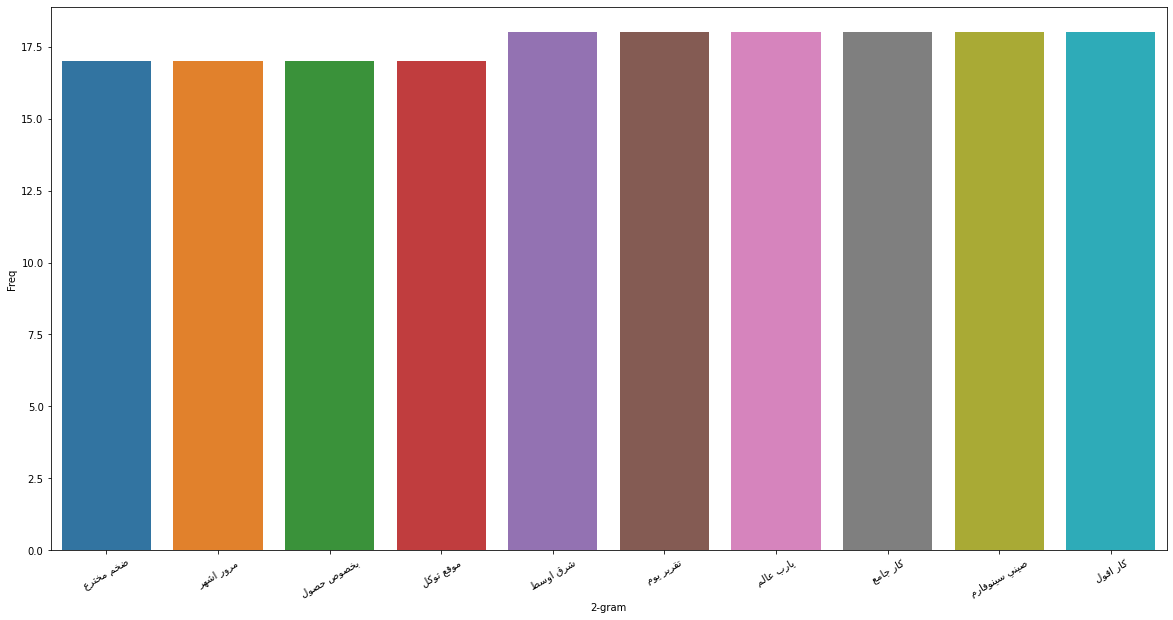

In [ ]:
get_rare_words(all_tweets,2,10)

### [3.2.5] 3-Gram Most frequently in all tweets


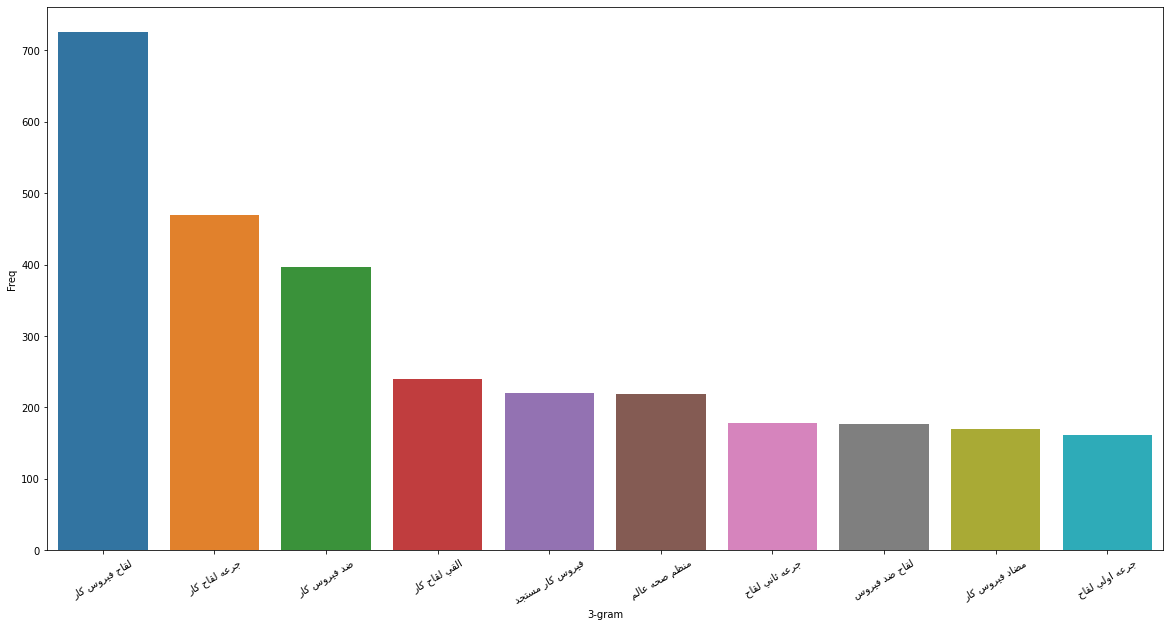

In [ ]:
get_ngram(all_tweets,3,10)

### [3.2.6] 3-Gram least frequently in all tweets


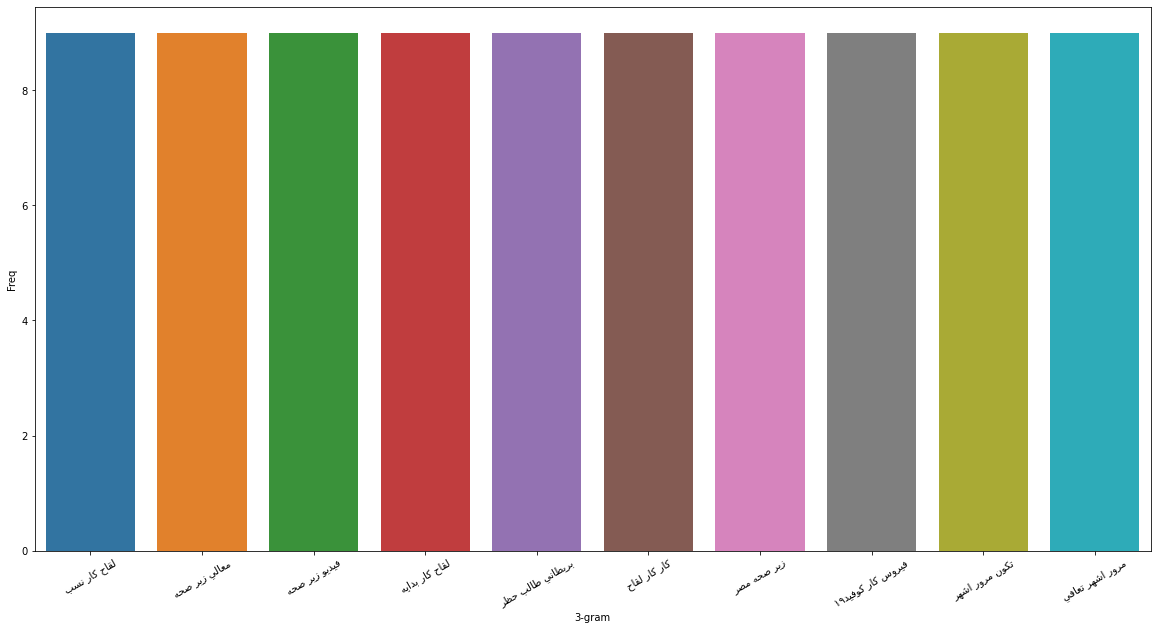

In [ ]:
get_rare_words(all_tweets,3,10)

### [3.2.7] words most frequently class_0 tweet


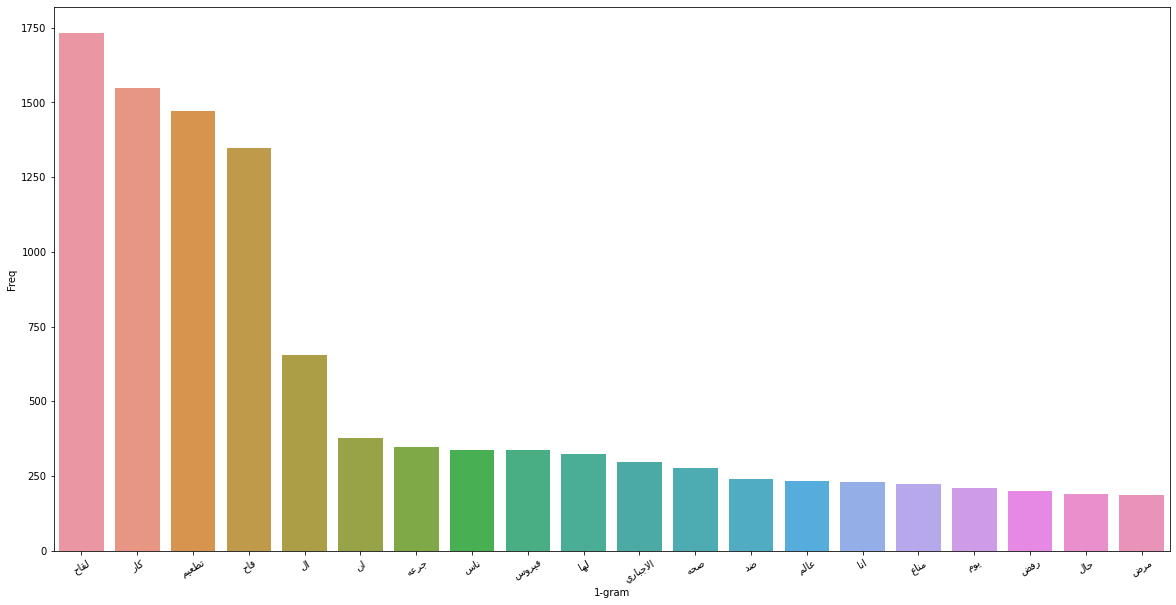

In [ ]:
get_ngram(class0_tweets,1,20)

نلاحظ ظهور كلمات مثل إجباري - رفض - ضد

### [3.2.8] words most frequently in class_1 tweets


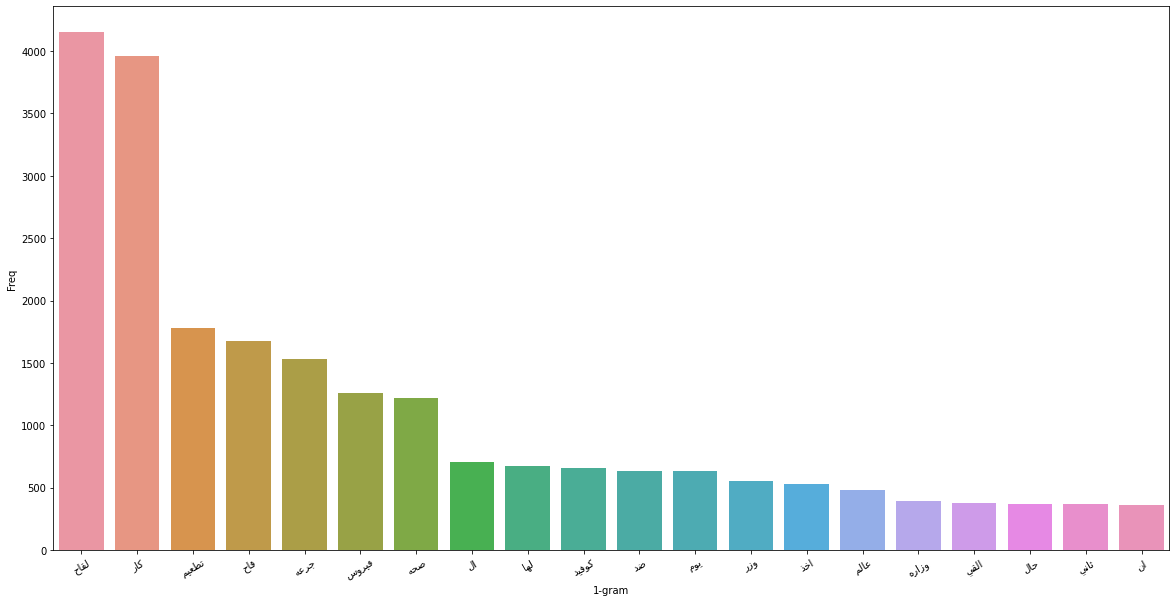

In [ ]:
get_ngram(class1_tweets,1,20)

### [3.2.9] words most frequently in class_2 tweets


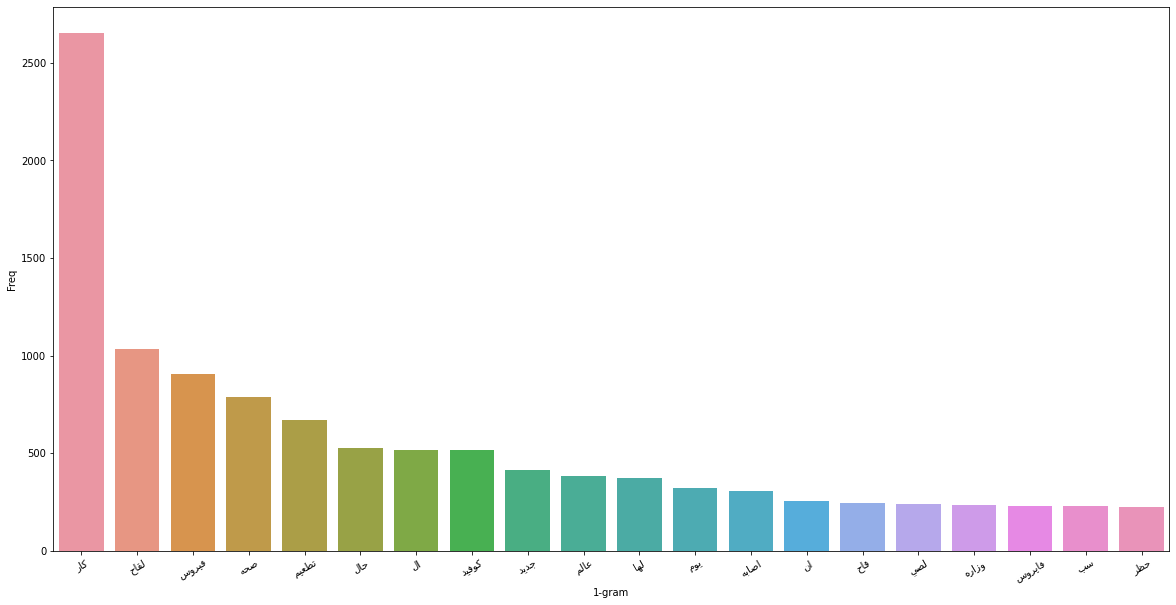

In [ ]:
get_ngram(class2_tweets,1,20)

### [3.2.10] words most frequently class_3 tweets


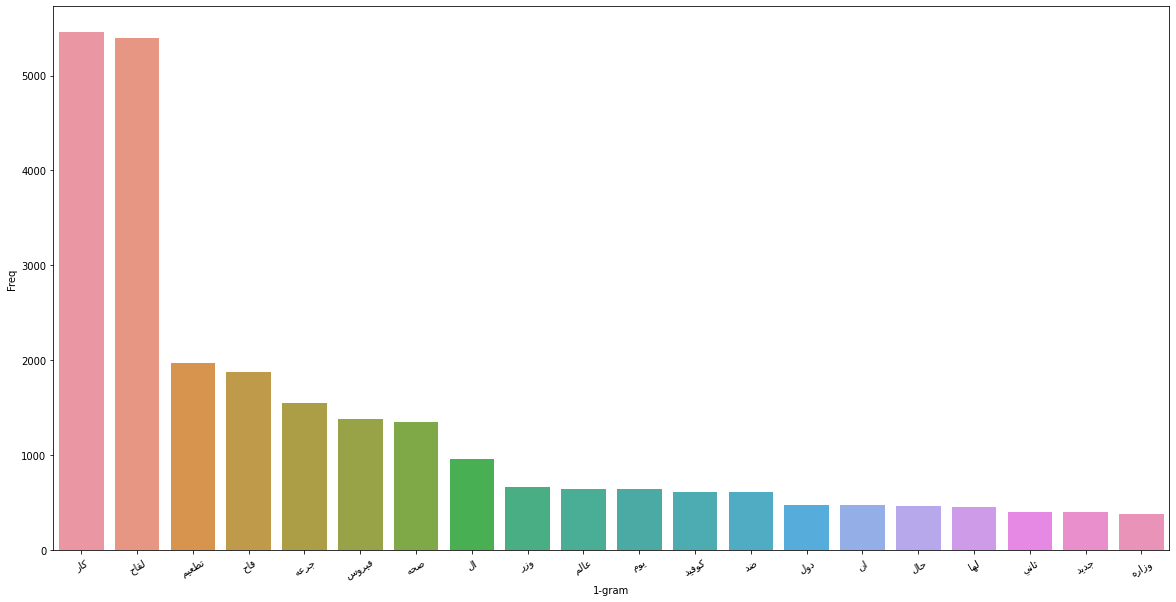

In [ ]:
get_ngram(class3_tweets,1,20)

## [3.3] Histogram for tweets lengths  


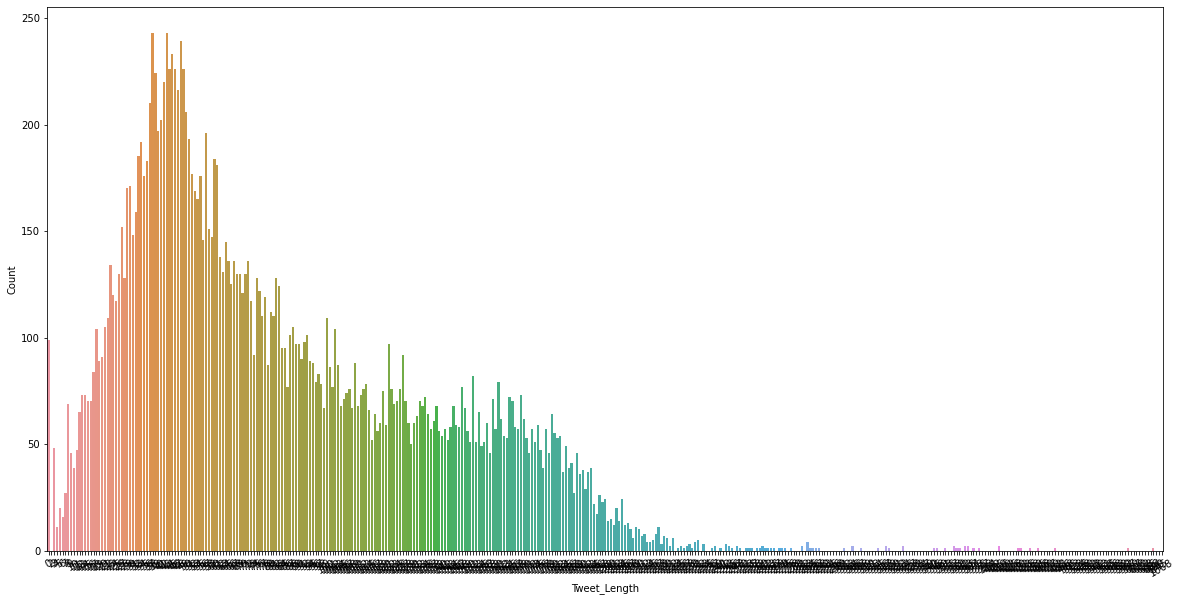

In [ ]:
# تابع يرد قاموس يحتوي على طول التغريدة وعدد التغريدات المساوية لهذا الطول

def length_freqs(df,text_field):
  all_tweets = get_all_tweets(df,text_field)
  length_dic = {}
  for tweet in all_tweets:
    length = len(tweet)
    if length not in length_dic:
      length_dic[length] = 0
    else :
      length_dic[length] += 1
  return length_dic


def draw_length_histogram(df,text_field):
  length_dic = length_freqs(df,text_field)
  length_df = pd.DataFrame({'Tweet_Length':list(length_dic.keys()), 'Count':list(length_dic.values())})
  plt.figure(figsize=(20, 10))
  histogram = seb.barplot(data=length_df, x = 'Tweet_Length', y = 'Count')
  histogram.set_xticklabels(histogram.get_xticklabels(), rotation=30)
  plt.show()

draw_length_histogram(df,'cleaned_tweet')

## [3.4] Hashtags  


In [ ]:
# الدخل ليستا من التغريدات
# الخرج ليستا تحتوي على كل الهاشتاغات الموجودة في التغريدات

def get_hashtag(tweets):
  hashs = []
  for t in tweets:
      ht = re.findall(r'#(\w+)', t)
      if len(ht)!=0:
        for h in ht:
          hashs.append(h)
  return hashs
#=============================================================================

# يرسم الهيستوغرام للهاشتاغات المكررة
# nltk.FreqDist  يقوم بحساب تكرار كل هاشتاع
# تخزين كل هاشتاغ والتكرار الخاص فيه داتا فريم
# ترتيب الداتا فريم تنازليا بناء على عدد التكرارات

def draw_hashtag_histogram(tweets,number):
  hashs = get_hashtag(tweets)
  ht_freq = nltk.FreqDist(hashs)
  res2 = {get_display(arabic_reshaper.reshape(k)): v for k,v in ht_freq.items()}
  hashs_df = pd.DataFrame(res2.items(), columns=['Hashtag', 'Count'])
  #ht_dframe = pd.DataFrame({'Hashtag':list(hashs_df.keys()), 'Count':list(hashs_df.values())})
  hashs_df = hashs_df.nlargest(columns='Count', n=number)
  plt.figure(figsize=(18, 8))
  histogram = seb.barplot(data=hashs_df, x = 'Hashtag', y = 'Count')
  histogram.set_xticklabels(histogram.get_xticklabels(), rotation=30)
  plt.show()
#==============================================================================

### [3.4.1] Hashtags most frequently in all tweets


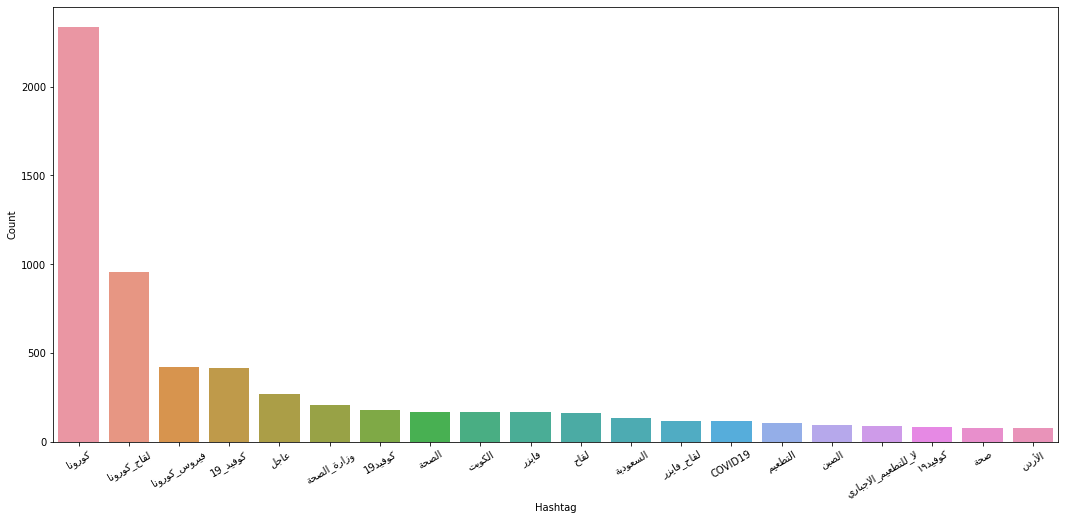

In [ ]:
all_tweets = get_all_tweets(df,'tweet')
draw_hashtag_histogram(all_tweets,20)

### [3.4.2] Hashtags most frequently in class_0 tweets


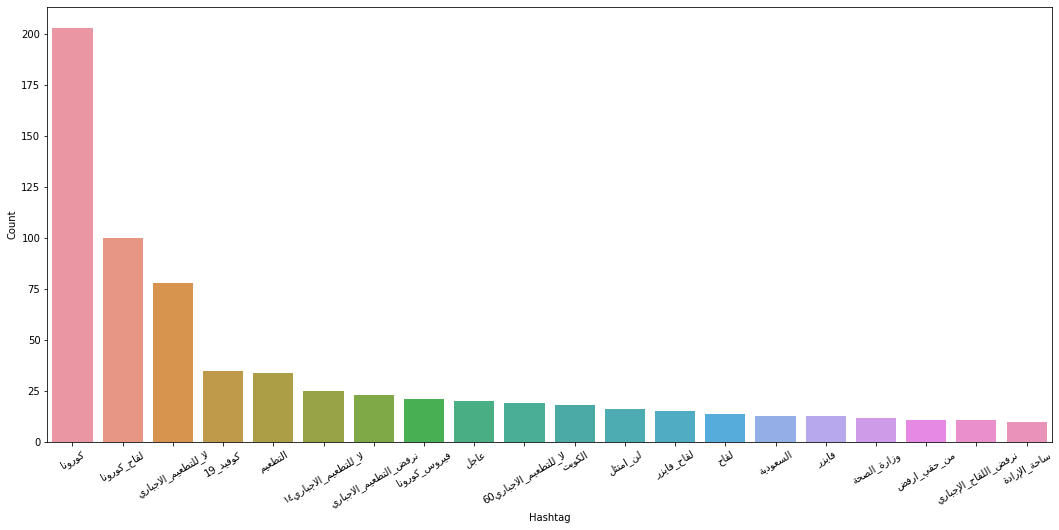

In [ ]:
neg_tweets = get_label_tweets(0,df,'tweet')
draw_hashtag_histogram(neg_tweets,20)

### [3.4.3] Hashtags most frequently in class_1 tweets


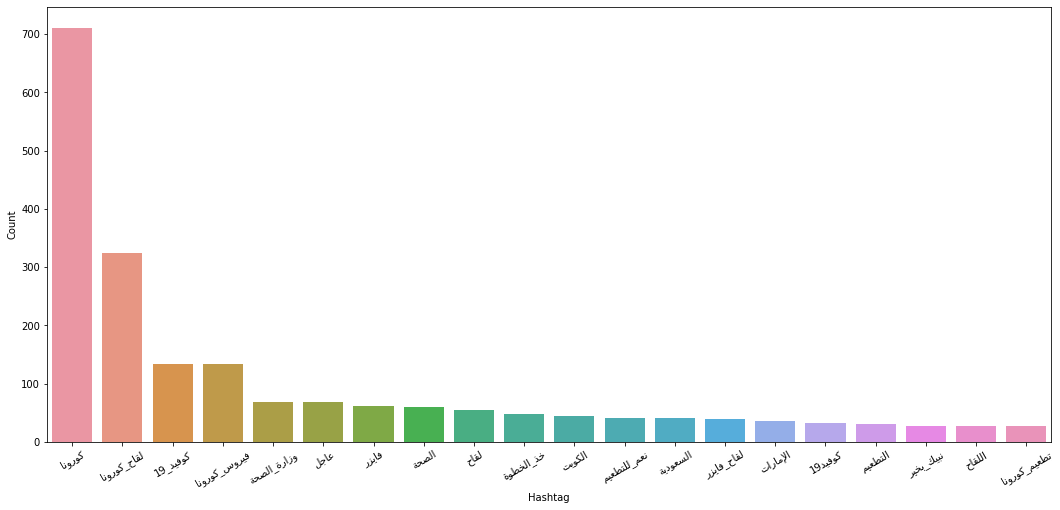

In [ ]:
pos_tweets = get_label_tweets(1,df,'tweet')
draw_hashtag_histogram(pos_tweets,20)

### [3.4.4] Hashtags most frequently in class_2 tweets


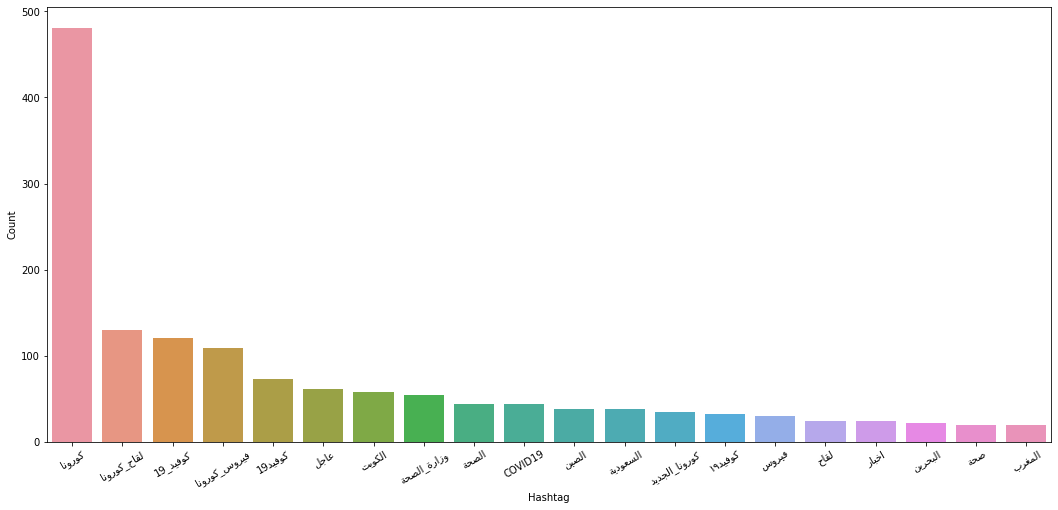

In [ ]:
non_related_tweets = get_label_tweets(2,df,'tweet')
draw_hashtag_histogram(non_related_tweets,20)

### [3.4.5] Hashtags most frequently in class_3 tweets


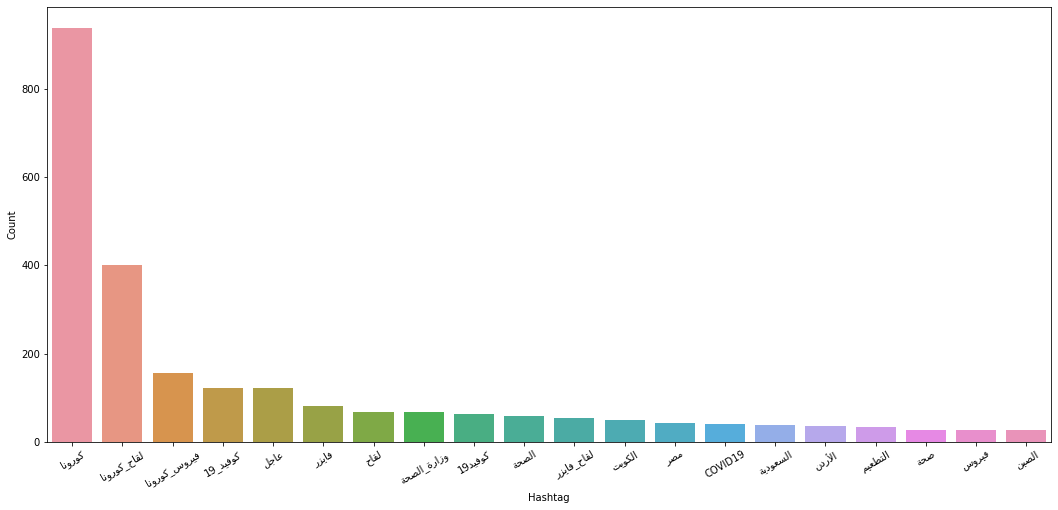

In [ ]:
neu_tweets = get_label_tweets(3,df,'tweet')
draw_hashtag_histogram(neu_tweets,20)